# Twitter Sentiment Analysis

### 1. Import Libraries

Import all the libraries to be used in this notebook. We load the initial libraries at the beginning and keep on adding more libraries as we go along on the project

In [1]:
# Import Libraries

import tweepy # for tweet mining
from textblob import TextBlob # TextBlob - Python library for processing textual data
from wordcloud import WordCloud # WordCloud - Python library for creating image wordclouds
from nltk.sentiment.vader import SentimentIntensityAnalyzer #  lexicon and rule-based sentiment analysis tool
import pandas as pd # for data manipulation and analysis
import numpy as np # for working with arrays and carrying out mathematical operations.
import re # In-built regular expressions library
import os # to access environment from the operating system 
import string # Inbuilt string library
import glob # to retrieve files/pathnames matching a specified pattern. 
import matplotlib.pyplot as plt  # for plotting
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
from dotenv import load_dotenv  # loading the  environment 


In [3]:
# Loading Environment from the operating system
load_dotenv()

True

In [4]:
# Natural Language Processing Toolkit
import nltk
import spacy
import emoji
import stop_words
# Tokenize - large quantity of text is divided into smaller parts 
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk import pos_tag # For Parts of Speech tagging
from collections import Counter # count the key-value pairs
from spacy import displacy # dependency visualizer that show model's predictions
nlp = spacy.load("en_core_web_sm") # English pipeline optimization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

### 2. Tweets Mining

We are using the Tweepy library for Python to scrape tweets. We created a developer account with Twitter to get the keys used below for this task.

In [5]:
# Get the API keys from env

consumer_key = os.getenv("TWITTER_API_KEY")
consumer_secret_key = os.getenv("TWITTER_API_SECRET_KEY")
access_token = os.getenv("TWITTER_ACCESS_TOKEN")
access_token_secret = os.getenv("TWITTER_ACCESS_TOKEN_SECRET")

# Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret_key)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [6]:
# checking the API keys validate or not

In [7]:
#type(consumer_key)

In [8]:
#type(consumer_secret_key)

In [9]:
#type(access_token)

In [10]:
#type(access_token_secret)

#### User-defined Functions for Tweets Mining

We created a functions for searching with different phrases, Example "EV Stock", "Best EV Stock", "EV Stock Future", "Top EV Maker". We do  different searches and each result store in a csv file. This is because we can be consistant with the data as we work along. 

In [11]:
def write_df_to_csv(df, file_name):
    df.to_csv(file_name, index=False)

In [12]:
def getTweets():
    keyword = input("Please enter keyword or hashtag to search: ")
    noOfTweet = int(input ("Number of tweets to analyze: "))
    tweet_list = []
    # Collect tweets using the Cursor object
    tweets = tweepy.Cursor(api.search, 
                           q=keyword, 
                           keyword = keyword + "  -filter:links AND -filter:retweets AND -filter:replies", 
                          lang="en",
                          tweet_mode='extended' ).items(noOfTweet)
     # Each item in the iterator has various attributes that you can access to get information about each tweet
    for tweet in tweets:
        tweet_list.append([
            tweet.id,
            tweet.created_at,
            tweet.full_text,
            tweet.user.location,
            tweet.retweet_count,
            tweet.favorite_count
        ])
    return tweet_list

In [13]:
tweet_list = getTweets()

Please enter keyword or hashtag to search: top electric car company
Number of tweets to analyze: 5000


In [14]:
tweet_list_df = pd.DataFrame(tweet_list,columns=["Id","Date", "Tweets","Location","Retweets","Favorite"])
tweet_list_df.head()

,Id,Date,Tweets,Location,Retweets,Favorite
0,1422620909035311107,2021-08-03 18:10:30,RT @BBC_TopGear: The Top Gear car review: Rima...,,65,0
1,1421086950098866178,2021-07-30 12:35:06,That's not even conspiracy theories look up l...,,0,0
2,1420196064792023043,2021-07-28 01:35:02,"I have clicked ""like"" on so many people's art ...",Texas,0,4
3,1420151498806333442,2021-07-27 22:37:57,"@cheekyspanky @DriveOnto Either way Adam, chec...",Sunderland,0,0


In [15]:
tweet_list_df.shape

(4, 6)

In [16]:
### USE DIFFERENT FILE NAME TO SAVE EACH SEARCH. OR else it will replace the previous data
write_df_to_csv(tweet_list_df,"EV_best_2_tweet.csv")

In [17]:
## read_csv with new search data to check. We do not need these lines .. 
## it is just to check if how may tweets we are getting. 

In [18]:
stock_tweet = pd.read_csv("EV_Stock_tweet.csv")

In [19]:
#stock_tweet.shape

In [20]:
#pwd

#### Combining all Tweets into single Pandas Dataframe

In [21]:
## commenting these lines as we got the tweets and save it to a csv

In [22]:
#path = "/Users/syedahasan/Desktop/EV_Sentiment_Trading"
##all_files = glob.glob(path + "/*.csv")
#all_files

In [23]:
#tweets = []

#for filename in all_files:
#    df = pd.read_csv(filename,  index_col=None, parse_dates=True,  header=0) # Convert each csv to a dataframe
#    tweets.append(df)

#tweets_df = pd.concat(tweets, axis=0, ignore_index=True) # Merge all dataframes
#tweets_df['Date']= pd.to_datetime(tweets_df['Date'])
#tweets_df.head()

In [24]:
# Write all tweets in one csv
# write_df_to_csv(tweets_df,"EV_ALL_TWEETS.csv")

In [25]:
tweets_df = pd.read_csv("EV_ALL_TWEETS.csv",  index_col=None, parse_dates=True,  header=0) 

In [26]:
tweets_df['Date']= pd.to_datetime(tweets_df['Date']).dt.normalize() # changing date time to date
tweets_df.head()

,Id,Date,Tweets,Location,Retweets,Favorite
0,1420544025631760384,2021-07-29,@ev_truths @alex_avoigt I think EV technology ...,"Seattle, WA",0,0
1,1420519469865177088,2021-07-28,Compact International(1994) Wants to be Top EV...,U.S.A,0,0
2,1419726996104486919,2021-07-26,RT @cliffski: Toyota are not much better than ...,"Louisville, KY",2,0
3,1419703662092472320,2021-07-26,Toyota are not much better than volkswagen. Th...,None of your business,2,4
4,1419665554038681606,2021-07-26,GM China’s Venture Has Big Ambitions Beyond $4...,Vancouver and London,0,0


In [27]:
tweets_df.dtypes

Id                   int64
Date        datetime64[ns]
Tweets              object
Location            object
Retweets             int64
Favorite             int64
dtype: object

### 3. Data Cleaning

The dataframe that is created on above, will be cleaned in this section. We are going to search for any duplication and will remove it. It is also important to mention that the Tweet ID was considered as the Primary key for all the dataframe. We are also going to replace the "NaN" values in Location column.

In [28]:
#Get number of rows and columns
tweets_df.shape 

(12676, 6)

In [29]:
tweets_df.duplicated(subset='Tweets').sum() # Check for duplicate values

4786

In [30]:
# drop duplicate values
tweets_df=tweets_df.drop_duplicates(subset='Tweets',keep="last") 

In [31]:
# Check the shape after dropping duplicates
tweets_df.shape 

(7890, 6)

In [32]:
# Check for "NaN" values
tweets_df.isna().any() 

Id          False
Date        False
Tweets      False
Location     True
Retweets    False
Favorite    False
dtype: bool

In [33]:
# Replace "NaN" values with "No Location"
tweets_df['Location']=tweets_df['Location'].fillna('No location') 

In [34]:
# Check for "NaN" values again
tweets_df.isna().any() 

Id          False
Date        False
Tweets      False
Location    False
Retweets    False
Favorite    False
dtype: bool

### 4. Processing

The Individual Tweer needed to be cleaned. We are using several functions to clean the tweet and to show the words used. We are extracting only the adjectives to a new column to view the weight.

In [35]:
# NLTK list of stopwords
from nltk.corpus import stopwords

In [36]:
# Lemmatization is a technique that transforms various morphologies of a word into its base form. 
from nltk.stem import WordNetLemmatizer 
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [37]:
def clean_tweet(text):
    text = text.lower()  #has to be in place
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions
    text = re.sub(r'#', '', text)  # Remove # symbol
    text = re.sub(r'$', '', text)  # Remove $ symbol
    text = re.sub(r'RT[\s]+','', text) # Remove RT
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove urls
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove hyperlink
    text = re.sub(r':','', text)
   
    sw = set(stopwords.words('english'))
    sw_addons = {'do', 'of', '$','r', '*,*','-',', ','``','\'s','.','-','public','rt',
                 'company', 'instead','&','’', 'in', 'car','they','\'your', 'what', 'also', 'seeing','agreement',
                 'time','today','ktown','pc','wts','105k','55k','ed','seeing','takeover','brokerages','rap','meet',
                 'vehicle','market','year','news','price','med','lpo','make',
                 'bakersfieldcart','takeaway','late','catching','lates','ranges'}
    words = word_tokenize(text)
    output = [x.lower() for x in words if x.lower() not in sw.union(sw_addons)]
    # Remove punctuations
    unpunctuated_words = [char for char in output if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)
    
    #return output
    
    return "".join(unpunctuated_words)  # join words with a space in between them

In [38]:
def give_emoji_free_text(text): 
    return emoji.get_emoji_regexp().sub(r'', text)


In [39]:
def sanitize(string):
    """ Sanitize one string """
    emoticon_string = r"""
        (?:
          [<>]?
          [:;=8]                     # eyes
          [\-o\*\']?                 # optional nose
          [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth      
          |
          [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
          [\-o\*\']?                 # optional nose
          [:;=8]                     # eyes
          [<>]?
        )"""
    stopwords = [w.lower() for w in stop_words.get_stop_words('en')]
    # remove graphical emoji
    string = give_emoji_free_text(string) 

    # remove textual emoji
    string = re.sub(emoticon_string,'',string)

    # normalize to lowercase 
    string = string.lower()

    # spacy tokenizer 
    string_split = [token.text for token in nlp(string)]

    # in case the string is empty 
    if not string_split:
        return '' 

    # join back to string 
    string = ' '.join(string_split)

    # remove user 
    # assuming user has @ in front
    string = re.sub(r"""(?:@[\w_]+)""",'',string)

    #remove # and @
    for punc in '":!@#':
        string = string.replace(punc, '')

    # remove 't.co/' links
    string = re.sub(r'http//t.co\/[^\s]+', '', string, flags=re.MULTILINE)

    # removing stop words 
    string = ' '.join([w for w in string.split() if w not in stopwords])
    string = re.sub(r"http\S+", "", string)
    return string

In [40]:
#print(tweets_df['Tweets'])

In [41]:
#print(sanitize(tweets_df['Tweets'][12671]))

In [42]:
tweets_df['Tweets'] = tweets_df['Tweets'].apply(sanitize)

In [43]:
 # remove one and two character words
tweets_df['Tweets'] = tweets_df['Tweets'].apply(lambda x: re.sub(r'\b\w{1,3}\b', '', x))
# remove punctuation
tweets_df['Tweets'] = tweets_df['Tweets'].apply(lambda x: re.sub('[^\w\s]', ' ', x))
# remove numerical values
tweets_df['Tweets'] = tweets_df['Tweets'].apply(lambda x: re.sub(r'[0-9]+', '', x))
# \s+ means all empty space (\n, \r, \t)
tweets_df['Tweets'] = tweets_df['Tweets'].apply(lambda x: re.sub('\s+', ' ', x))
    

In [44]:
#tweets_df['Tweets']

In [45]:
tweets_df['Processed_Tweets'] = tweets_df['Tweets'].apply(clean_tweet)

In [46]:
#print(tweets_df['Processed_Tweets'][12671])

In [47]:
#tweets_df['Processed_Tweets']

In [48]:
# Helper functions
def all_noun(tweet):
    """
    This function retrieves all the nouns on the given text.
    
    Args:
        text (string): The text to analyze.
        
    Returns:
        nouns (list): A list with all the nouns in the text.
    """
   
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "NN"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [49]:
# Helper functions
def all_adjectives(tweet):
    """
    This function retrieves all the adjectives on the given text.
    
    Args:
        text (string): The text to analyze.
        
    Returns:
        adjs (list): A list with all the adjectives in the text.
    """
   
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [50]:
# Apply all_noun function to the new 'Processed Tweets' column to generate a new column called 'Tweets_Nouns'
tweets_df['Tweets_Nouns'] = tweets_df['Processed_Tweets'].apply(all_noun)

In [51]:
tweets_df['Tweets_Adjectives'] = tweets_df['Processed_Tweets'].apply(all_adjectives)

In [52]:
def get_word_counts(t, w):
    """
    This function counts the occurrences of a word in a text.
    
    Args:
        text (string): The text where word counts will be analyzed.
        word (string): The word to look into the text.
        
    Returns:
        word_count (int): The counts of the word in the given text.
    """
    
    # Use the word_tokenize module from NLTK to tokenize the text
    tok = word_tokenize(t)
    
    # Create a list with all the tokens retrieved from the text
    tok = [w.lower() for w in tok]
    
    # Count the occurrences of the word in the text
    word_count = tok.count(w)
    
    return word_count

In [53]:
# function to return words to their base form using Lemmatizer
# ref: https://jess-analytics.medium.com/
def preprocessTweetsSentiments(tweet):
    
    tweet_tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(w) for w in tweet_tokens]
    return " ".join(lemma_words)

In [54]:
# Apply preprocessTweetsSentiments function to the 'Processed Tweets' column to generate a new column
tweets_df['Tweets_Lemmatize'] = tweets_df['Processed_Tweets'].apply(preprocessTweetsSentiments)

In [55]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = tweets_df['Tweets_Adjectives'].tolist()
tweets_long_string = " ".join(tweets_long_string)

In [56]:
from PIL import Image # for opening, manipulating, and saving many different image file 
# Import Twitter Logo
image = np.array(Image.open('twitter.png'))

In [57]:
# Create function to generate the blue colour for the Word CLoud
def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

<Figure size 1008x1296 with 0 Axes>

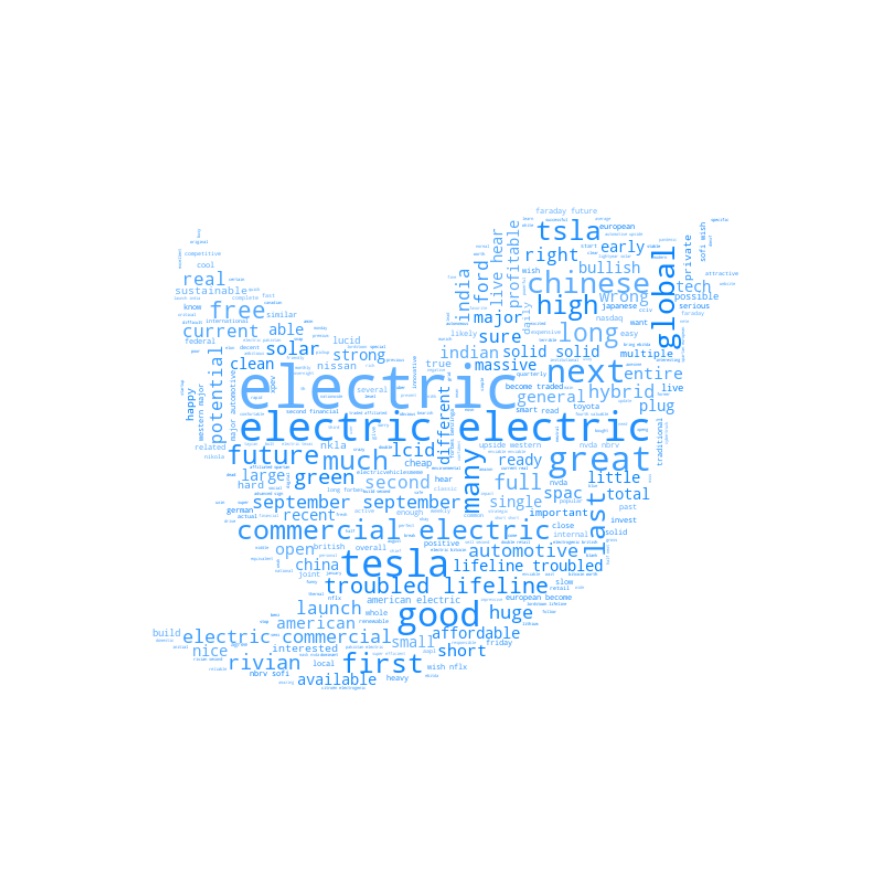

In [58]:
import random # generating random numbers
# Instantiate the Twitter word cloud object
# ref: https://amueller.github.io/word_cloud/auto_examples/masked.html
twitter_wc = WordCloud(background_color='white', max_words=1500, mask=image)

# generate the word cloud
twitter_wc.generate(tweets_long_string)
fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)  # set width
fig.set_figheight(18)  # set height

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

In [59]:
# Combine all words into a list
tweets_long_string = tweets_df['Tweets_Adjectives'].tolist()
tweets_list=[]
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [60]:
# Use the Built-in Python Collections module to determine Word frequency
counts = Counter(tweets_list)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ['Words', 'Count']
df.sort_values(by='Count', ascending=False, inplace=True)
df.head(5)

,Words,Count
5,electric,1580
12,tesla,236
75,next,206
30,good,206
26,great,192


### 5. Sentiment Analysis

In this section, the aim was to undertand the sentiment of the Twitter Users while describe Electric Vehicle. 

In [61]:
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [62]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return  "Positive" if (result == 1) else "Neutral" if result == 0 else "Negative"

In [63]:
# Sentiment scores dictionaries
tweet_sent = {
    "tweet": [],
    "compound": [],
    "positive": [],
    "neutral": [],
    "negative": [],
    "sentiment": [],
}

# Get sentiment for the tweet
# iterrows() method is used to iterate across the dataframe 
for index, row in tweets_df.iterrows():
    try:
        # Sentiment scoring 
        tweet_sentiment = analyzer.polarity_scores(row["Processed_Tweets"])  # VADER sentiment scores are retrieved for tweets
        tweet_sent["tweet"].append(row["Processed_Tweets"])
        tweet_sent["compound"].append(tweet_sentiment["compound"])
        tweet_sent["positive"].append(tweet_sentiment["pos"])
        tweet_sent["neutral"].append(tweet_sentiment["neu"])
        tweet_sent["negative"].append(tweet_sentiment["neg"])
        tweet_sent["sentiment"].append(get_sentiment(tweet_sentiment["compound"]))
        
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame

tweet_sentiment_df = pd.DataFrame(tweet_sent)
tweet_sentiment_df2 = tweets_df["Processed_Tweets"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [64]:
tweet_sentiment_df2 = tweet_sentiment_df2.reset_index()

In [65]:
del tweet_sentiment_df2["index"]

In [66]:
tweet_date_df = tweets_df[["Date"]]

In [67]:
tweet_date_df.columns = ["date"]

In [68]:
tweet_date_df = tweet_date_df.reset_index()

In [69]:
tweet_date_df.shape

(7890, 2)

In [70]:
del tweet_date_df["index"]

In [71]:
tweet_sentiment_df2 = tweet_sentiment_df2.rename(columns={"0":"polarity","1":"subjectivity"})

In [72]:
tweet_sentiment_df2.columns = ["polarity","subjectivity"]

In [73]:
tweet_sentiment_df2.shape

(7890, 2)

In [74]:
tweet_sentiment_final = pd.concat([tweet_sentiment_df, tweet_sentiment_df2,tweet_date_df],axis=1,join="inner")

In [75]:
## ref : https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
#Count_values for sentiment
count_values_in_column(tweet_sentiment_final,"sentiment")

,Total,Percentage
Positive,3930,49.81
Neutral,2876,36.45
Negative,1084,13.74


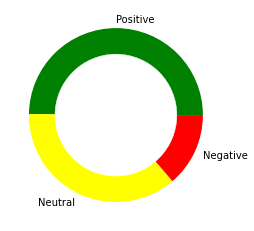

In [76]:
# create data for Pie Chart
pichart = count_values_in_column(tweet_sentiment_df,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color="white")
plt.pie(size, labels=names, colors=["green","yellow","red"])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [77]:
# Getting the TF-IDF
# A TfidfVectorizer() instance is created by passing the stopwords in English as a parameter.
vectorizer = TfidfVectorizer(stop_words="english")
X_tweets = vectorizer.fit_transform(tweets_df['Tweets_Lemmatize'])

In [78]:
# Getting matrix info
print(f"Matrix shape: {X_tweets.shape}")
print(f"Total number of tweets: {X_tweets.shape[0]}")
print(f"Total number of unique words (tokens): {X_tweets.shape[1]}")

Matrix shape: (7890, 10283)
Total number of tweets: 7890
Total number of unique words (tokens): 10283


In [79]:
# Retrieve words list from tweets
words_tweets = vectorizer.get_feature_names()
#print(words_tweets)

In [80]:
# Getting the TF-IDF weight of each word in corpus as DataFrame
# The mean value of the TF–IDF for each term is used to create the DataFrame.
words_tweets_df = pd.DataFrame(
    list(zip(words_tweets, np.ravel(X_tweets.mean(axis=0)))), columns=["Word", "TF-IDF"]
)

words_tweets_df = words_tweets_df.sort_values(by=["TF-IDF"], ascending=False)

In [81]:
words_tweets_df.head()

,Word,TF-IDF
8736,stock,0.028767
2951,electric,0.028567
9160,tesla,0.021217
838,battery,0.013236
7915,sale,0.012429


In [82]:
#Function to ngram
def get_top_n_gram(tweets,ngram_range,n=None):
    countVectorizer = CountVectorizer(ngram_range=ngram_range,stop_words = "english").fit(tweets)
    bag_of_words = countVectorizer.transform(tweets)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in countVectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tweets_df["Processed_Tweets"],(2,2),20)
ndf = pd.DataFrame(n2_bigrams, columns=["Bigrams","Count"]).set_index('Bigrams')

<AxesSubplot:ylabel='Bigrams'>

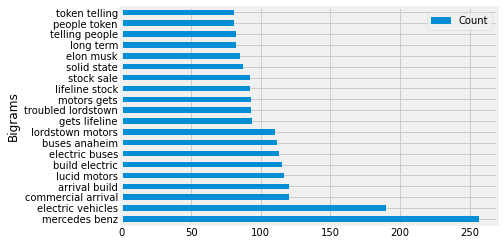

In [83]:
ndf.plot(kind='barh')

In [84]:
tweet_string = ''
for x in tweets_df["Processed_Tweets"]:
    tweet_string += ' ' + x

In [85]:
doc = nlp(tweet_string)

# Render NER visualization with displacy to determine entities for extraction
displacy.render(doc, style='ent')

In [86]:
# Extract geopolitical and organizational entities
entities = [x.text for x in doc.ents if x.label_ in ['GPE', 'ORG']]

In [87]:
# lower and join each entity for word cloud creation
entities = [i.lower().replace(' ', '_') for i in entities]

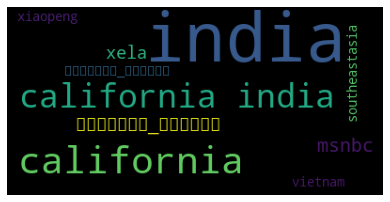

In [88]:
# Generate wordcloud
wc = WordCloud().generate(' '.join(entities))
plt.axis('off')
plt.imshow(wc)

In [89]:
# The Tone Analyzer response is given in JSON format, 
# so the json_normalize function is imported from Pandas to transform the JSON response to a DataFrame.
from pandas import json_normalize

# ToneAnalyzerV3 is the main library to access to the Tone Analyzer via Python.
from ibm_watson import ToneAnalyzerV3

# IAMAuthenticator is used to authenticate your Python application to access the IBM cloud services.
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

import json

In [90]:
# Get the Tone Analyzer API Key and URL
tone_api = os.getenv("IBM_API")
tone_url = os.getenv("IBM_URL")

In [91]:
# Initialize Tone Analyser Client

# Create authentication object
authenticator = IAMAuthenticator(tone_api)

# Create tone_analyzer instance
tone_analyzer = ToneAnalyzerV3(
    version="2017-09-21",
    authenticator=authenticator
)

# Set the service endpoint
tone_analyzer.set_service_url(tone_url)

In [92]:
tweets_sh = tweets_df.iloc[:1000]
tweets_sh = tweets_sh.drop_duplicates('Processed_Tweets', keep='last')

In [93]:
tweet_sh_string = ''
for x in tweets_sh['Processed_Tweets']:
    tweet_sh_string += '. ' + x

In [94]:
# Analyze the text's tone with the 'tone()' method.

# tone(): The general tone analysis, aimed to score tone on short text
# (such as reviews, emails, or social media) or even larger texts (such as articles or blog post)

# it only needs to receive a text to score, however, additional parameters could be used
# https://cloud.ibm.com/apidocs/tone-analyzer?code=python#data-handling

tone_analysis = tone_analyzer.tone( 
    {"text": tweet_sh_string},
    content_type="application/json",
    content_language="en",
    accept_language="en",
).get_result()

# Display tone analysis results
#print(json.dumps(tone_analysis, indent=2))

# On the JSON response, the tone is given for the entire document on the document_tone element 
# as well as for each sentence of the document on the sentences_tone element.

In [95]:
# Sentences Tones
sentences_tone_df = json_normalize(
    data=tone_analysis["sentences_tone"],
    record_path=["tones"],
    meta=["sentence_id", "text"],
)
sentences_tone_df.head()

,score,tone_id,tone_name,sentence_id,text
0,0.845678,joy,Joy,0,. think technology still pretty room improve b...
1,0.842108,analytical,Analytical,0,. think technology still pretty room improve b...
2,0.751520,tentative,Tentative,0,. think technology still pretty room improve b...
3,0.882284,analytical,Analytical,1,compact international wants brake maker.
4,0.607730,joy,Joy,2,toyota much better volkswagen legacy companies...


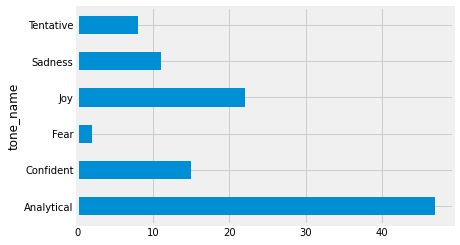

In [96]:
sentences_tone_df.groupby('tone_name')['score'].nunique().plot(kind='barh')
plt.show()

In [97]:
# from datetime import datetime, timedelta
# import alpaca_trade_api as tradeapi
# # The News API allows only a limited number of articles to be accessed each day.
# from newsapi.newsapi_client import NewsApiClient

In [98]:
# # create a sentiment index from News API headlines and correlate it to S&P 500 daily returns, 
# # looking for a text topic that generates the highest correlation.

# # Load .env enviroment variables
# load_dotenv()
# api_key=os.environ["NEWS_API"]
# # Set News API Key
# newsapi = NewsApiClient(api_key)

# # Set Alpaca API key and secret
# alpaca_api_key = os.getenv("ALPACA_API_KEY")
# alpaca_secret_key = os.getenv("ALPACA_API_SECRET")

# api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [99]:
# # Set the ticker
# ticker = "TSLA"

# # Set timeframe to '1D'
# timeframe = "1D"

# # Set current date and the date from one month ago using the ISO format
# current_date = pd.Timestamp(datetime.now(), tz="America/New_York").isoformat()
# past_date = pd.Timestamp(datetime.now()- timedelta(30), tz="America/New_York").isoformat()

# # Get 4 weeks worth of historical data for AAPL
# df = api.get_barset(
#     ticker,
#     timeframe,
#     limit=None,
#     start=past_date,
#     end=current_date,
#     after=None,
#     until=None,
# ).df

# # Display data
# df.head()

In [100]:
# # Drop Outer Table Level
# df = df.droplevel(axis=1, level=0)

# # Use the drop function to drop extra columns
# df = df.drop(columns=["open", "high", "low", "volume"])

# # Since this is daily data, we can keep only the date (remove the time) component of the data
# df.index = df.index.date

# # Display sample data
# df.head()

In [101]:
# # Use the `pct_change` function to calculate daily returns of AAPL
# tsla_returns = df.pct_change().dropna()

# # Display sample data
# tsla_returns.head()

In [102]:
# # Use newsapi client to get most relevant 20 headlines per day in the past month
# def get_headlines(keyword):
#     all_headlines = []
#     all_dates = []    
#     date = datetime.strptime(current_date[:10], "%Y-%m-%d")
#     end_date = datetime.strptime(past_date[:10], "%Y-%m-%d")
#     print(f"Fetching news about '{keyword}'")
#     print("*" * 30)
#     while date > end_date:
#         print(f"retrieving news from: {date}")
#         articles = newsapi.get_everything(
#             q=keyword,
#             from_param=str(date)[:10],
#             to=str(date)[:10],
#             language="en",
#             sort_by="relevancy",
#             page=1,
#         )
#         headlines = []
#         for i in range(0, len(articles["articles"])):
#             headlines.append(articles["articles"][i]["title"])
#         all_headlines.append(headlines)
#         all_dates.append(date)
#         date = date - timedelta(days=1)
#     return all_headlines, all_dates

In [103]:
# tsla_headlines, dates = get_headlines("tsla")

In [104]:
# ford_headlines, _ = get_headlines("NYSE: F")

In [105]:
# ev_headlines, _ = get_headlines("electric vehicles")

In [106]:
# # Instantiate SentimentIntensityAnalyzer
# sid = SentimentIntensityAnalyzer()

In [107]:
# # Create function that computes average compound sentiment of headlines for each day
# def headline_sentiment_summarizer_avg(headlines):
#     sentiment = []
#     for d in headlines: 
#         day_score = []
#         for h in d:
#             if h == None:
#                 continue
#             else:
#                 day_score.append(sid.polarity_scores(h)["compound"])
#         sentiment.append(sum(day_score) / len(day_score))
#     return sentiment

In [108]:
# tsla_news = headline_sentiment_summarizer_avg(tsla_headlines)
# ford_news = headline_sentiment_summarizer_avg(ford_headlines)
# ev_news = headline_sentiment_summarizer_avg(ev_headlines)

In [109]:
# # Combine Sentiment Averages into DataFrame
# topic_sentiments = pd.DataFrame(
#     {
#         "tsla_news": tsla_news,
#         "ford_news": ford_news,
#         "ev_news": ev_news,
#     }
# )

In [110]:
# topic_sentiments.index = pd.to_datetime(dates)

In [111]:
# # Merge with RETURNS 
# topic_sentiments = tsla_returns.join(topic_sentiments).dropna(how="any")

# # Display data
# display(topic_sentiments)

In [112]:
# # Correlate the headlines' sentiment to returns
# topic_sentiments.corr().style.background_gradient()

In [113]:
import yfinance as yf

In [114]:
#########################################################################################################################

In [115]:
# function to call stock into, but needs work

# def stockinfo(
#         # get data from Yahoo Finance
#         symbol = yf.Ticker(ticker),
#         symbol_hist = symbol.history(period='5y'),
#         # drop unnecessary columns
#         symbol_hist = symbol_hist.drop(["Dividends","Stock Splits"],axis = 1),
#         # drop NA
#         symbol_hist = symbol_hist.dropna(),
#         # sort data by Date(ascending)
#         symbol_hist = symbol_hist.sort_index(ascending=True)
# ):
    
#     return stockinfo

In [116]:
#########################################################################################################################

In [117]:
TSLA = yf.Ticker('TSLA')

In [118]:
df_tesla = TSLA.history(period="5y").drop(["Dividends","Stock Splits"],axis = 1)
df_tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-08-05,46.000000,46.400002,45.480000,46.006001,16026000
2016-08-08,45.599998,45.919998,45.217999,45.231998,11318000
2016-08-09,45.363998,46.307999,45.330002,45.816002,11039000
2016-08-10,45.647999,45.973999,44.924000,45.130001,11691500
2016-08-11,45.234001,45.514000,44.681999,44.981998,9404500


In [119]:
#########################################################################################################################

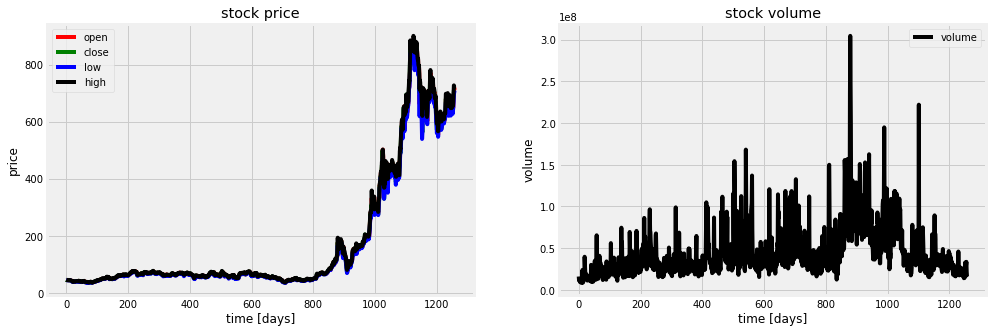

In [120]:
# Can add funtion here for each stock

plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df_tesla.Open.values, color='red', label='open')
plt.plot(df_tesla.Close.values, color='green', label='close')
plt.plot(df_tesla.Low.values, color='blue', label='low')
plt.plot(df_tesla.High.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df_tesla.Volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

In [121]:
#########################################################################################################################

In [122]:
# LSTM RNN Model

In [123]:
def window_data(df_tesla, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df_tesla) - window):
        features = df_tesla.iloc[i : (i + window), feature_col_number]
        target = df_tesla.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [124]:
# Define the window size
window_size = 30

# Set the index of the feature and target columns
feature_column = 1
target_column = 1

# Create the features (X) and target (y) data using the window_data() function.
X, y = window_data(df_tesla, window_size, feature_column, target_column)

# Print a few sample values from X and y
print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[46.40000153 45.91999817 46.30799866 45.97399902 45.51399994 45.33000183
  45.90000153 45.43799973 44.9659996  45.13199997 45.0340004  45.02199936
  45.69800186 45.43000031 44.75999832 44.5719986  44.08000183 43.22200012
  42.52000046 42.22000122 40.63999939 40.65000153 41.29999924 39.97800064
  39.98400116 40.27399826 39.69800186 39.58399963 40.50400162 41.13999939]
 [45.91999817 46.30799866 45.97399902 45.51399994 45.33000183 45.90000153
  45.43799973 44.9659996  45.13199997 45.0340004  45.02199936 45.69800186
  45.43000031 44.75999832 44.5719986  44.08000183 43.22200012 42.52000046
  42.22000122 40.63999939 40.65000153 41.29999924 39.97800064 39.98400116
  40.27399826 39.69800186 39.58399963 40.50400162 41.13999939 41.88600159]
 [46.30799866 45.97399902 45.51399994 45.33000183 45.90000153 45.43799973
  44.9659996  45.13199997 45.0340004  45.02199936 45.69800186 45.43000031
  44.75999832 44.5719986  44.08000183 43.22200012 42.52000046 42.22000122
  40.63999939 40.65

In [125]:
# Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [126]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [127]:
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Print some sample data after reshaping the datasets
print (f"X_train sample values:\n{X_train[:3]} \n")
print (f"X_test sample values:\n{X_test[:3]}")

X_train sample values:
[[[0.01094905]
  [0.01039314]
  [0.0108425 ]
  [0.01045568]
  [0.00992294]
  [0.00970984]
  [0.01036998]
  [0.00983492]
  [0.00928828]
  [0.00948053]
  [0.00936703]
  [0.00935313]
  [0.01013604]
  [0.00982565]
  [0.0090497 ]
  [0.00883197]
  [0.00826217]
  [0.00726848]
  [0.00645547]
  [0.00610803]
  [0.00427817]
  [0.00428975]
  [0.00504254]
  [0.00351148]
  [0.00351843]
  [0.00385429]
  [0.0031872 ]
  [0.00305517]
  [0.00412066]
  [0.00485724]]

 [[0.01039314]
  [0.0108425 ]
  [0.01045568]
  [0.00992294]
  [0.00970984]
  [0.01036998]
  [0.00983492]
  [0.00928828]
  [0.00948053]
  [0.00936703]
  [0.00935313]
  [0.01013604]
  [0.00982565]
  [0.0090497 ]
  [0.00883197]
  [0.00826217]
  [0.00726848]
  [0.00645547]
  [0.00610803]
  [0.00427817]
  [0.00428975]
  [0.00504254]
  [0.00351148]
  [0.00351843]
  [0.00385429]
  [0.0031872 ]
  [0.00305517]
  [0.00412066]
  [0.00485724]
  [0.00572121]]

 [[0.0108425 ]
  [0.01045568]
  [0.00992294]
  [0.00970984]
  [0.01036998

In [128]:
# Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [129]:
 # Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = 30
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [130]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [131]:
# Train the model
epochs = 10
batch_size = 90
model.fit(X_train, y_train, epochs = epochs, shuffle=False, batch_size=batch_size, verbose=1)

Epoch 1/10
10/10 [==============================] - 4s 37ms/step - loss: 4.9050e-04
Epoch 2/10
10/10 [==============================] - 0s 33ms/step - loss: 3.3558e-04
Epoch 3/10
10/10 [==============================] - 0s 32ms/step - loss: 3.5472e-04
Epoch 4/10
10/10 [==============================] - 0s 33ms/step - loss: 2.1611e-04
Epoch 5/10
10/10 [==============================] - 0s 32ms/step - loss: 1.7822e-04
Epoch 6/10
10/10 [==============================] - 0s 33ms/step - loss: 1.5232e-04
Epoch 7/10
10/10 [==============================] - 0s 32ms/step - loss: 2.0473e-04
Epoch 8/10
10/10 [==============================] - 0s 33ms/step - loss: 1.8545e-04
Epoch 9/10
10/10 [==============================] - 0s 33ms/step - loss: 1.0658e-04
Epoch 10/10
10/10 [==============================] - 0s 32ms/step - loss: 1.0342e-04


In [132]:
# Evaluate the model
model.evaluate(X_test, y_test, verbose=0)

0.007812539115548134

In [133]:
# Make predictions using the testing data X_test
predicted = model.predict(X_test)

In [134]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [135]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = df_tesla.index[-len(real_prices): ]) 

# Show the DataFrame's head
stocks.tail()

,Actual,Predicted
Date,,
2021-07-29,683.690002,757.977539
2021-07-30,697.530029,757.651855
2021-08-02,726.940002,757.717163
2021-08-03,722.650024,758.516663
2021-08-04,724.900024,760.068726


<AxesSubplot:title={'center':'Actual Vs. Predicted TSLA Prices'}, xlabel='Date'>

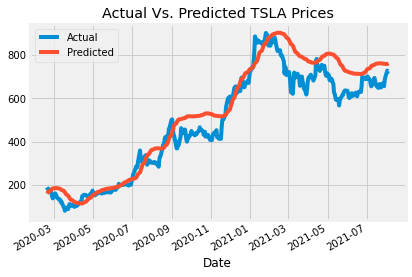

In [136]:
# Plot the real vs predicted prices as a line chart
stocks.plot(title="Actual Vs. Predicted TSLA Prices")

In [137]:
df_tesla

,Open,High,Low,Close,Volume
Date,,,,,
2016-08-05,46.000000,46.400002,45.480000,46.006001,16026000
2016-08-08,45.599998,45.919998,45.217999,45.231998,11318000
2016-08-09,45.363998,46.307999,45.330002,45.816002,11039000
2016-08-10,45.647999,45.973999,44.924000,45.130001,11691500
2016-08-11,45.234001,45.514000,44.681999,44.981998,9404500
...,...,...,...,...,...
2021-07-29,649.789978,683.690002,648.799988,677.349976,30394600
2021-07-30,671.760010,697.530029,669.000000,687.200012,29600500
2021-08-02,700.000000,726.940002,698.400024,709.669983,33615800


In [138]:
#########################################################################################################################

In [139]:
# SVM

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [141]:
# Can we replicate this code below for buy/sell? 

In [142]:
# https://github.com/hima888/Stock-prices-with-Sentiment-Analysis-for-better-Prediction-of-Stock-Price-Movement/blob/master/SVM(sell-buy)%20decision%20stock%20prediction%20%20.ipynb

In [143]:
svm_tesla = df_tesla[['Close']]
svm_tesla.head()

,Close
Date,
2016-08-05,46.006001
2016-08-08,45.231998
2016-08-09,45.816002
2016-08-10,45.130001
2016-08-11,44.981998


In [144]:
svm_tweet = tweet_sentiment_final[['positive','neutral','negative','sentiment','date']].set_index('date')
svm_tweet

,positive,neutral,negative,sentiment
date,,,,
2021-07-29,0.612,0.388,0.000,Positive
2021-07-28,0.000,1.000,0.000,Neutral
2021-07-26,0.565,0.435,0.000,Positive
2021-07-26,0.476,0.524,0.000,Positive
2021-07-26,0.000,1.000,0.000,Neutral
...,...,...,...,...
2021-07-22,0.195,0.805,0.000,Positive
2021-07-22,0.116,0.730,0.155,Negative
2021-07-21,0.000,1.000,0.000,Neutral


In [147]:
combined_df = pd.concat([svm_tesla,svm_tweet])
combined_df.tail()

,Close,positive,neutral,negative,sentiment
2021-07-22,NaN,0.195,0.805,0.000,Positive
2021-07-22,NaN,0.116,0.730,0.155,Negative
2021-07-21,NaN,0.000,1.000,0.000,Neutral
2021-07-21,NaN,0.212,0.788,0.000,Positive
2021-07-21,NaN,0.324,0.676,0.000,Positive


In [148]:
y = svm_tweet["sentiment"]
X = svm_tweet.drop(columns="sentiment")

In [150]:
# Use the train_test_split function to create training and testing subsets
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(5917, 3)

In [151]:
# Instantiate a linear SVM model
# from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier

SVC(kernel='linear')

In [152]:
# Fit the data
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [154]:
# Score the accuracy
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9756633429102586
Testing Data Score: 0.9782057780030411


In [157]:
# Make predictions using the test data
predictions = classifier.predict(X_test)
results = pd.DataFrame({
    "Prediction": predictions, 
    "Actual": y_test
}).reset_index(drop=True)
results.tail()

,Prediction,Actual
1968,Neutral,Neutral
1969,Neutral,Neutral
1970,Neutral,Neutral
1971,Neutral,Neutral
1972,Positive,Positive


In [158]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[263,   5,   3],
       [  6, 686,  27],
       [  2,   0, 981]], dtype=int64)

In [160]:
from sklearn.metrics import classification_report

In [161]:
# from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    Negative       0.97      0.97      0.97       271
     Neutral       0.99      0.95      0.97       719
    Positive       0.97      1.00      0.98       983

    accuracy                           0.98      1973
   macro avg       0.98      0.97      0.98      1973
weighted avg       0.98      0.98      0.98      1973



In [ ]:
#########################################################################################################################